In [1]:
import sympy 
sympy.init_printing()
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import control


import scipy.optimize
from tbcontrol.responses import fopdt, sopdt
from ipywidgets import interact

def resultplot1(K, tau, theta, y0):
    plt.figure(figsize=(21, 7))
    plt.scatter(ts, ym)
    plt.plot(ts, fopdt(ts, K, tau, theta, y0), color='red')
    plt.grid(True)

def resultplot2(K, tau, zeta, theta, y0):
    plt.figure(figsize=(21, 7))
    plt.scatter(ts, ym)
    plt.plot(ts, sopdt(ts, K, tau, zeta,theta, y0), color='red')
    plt.grid(True)
    


In [2]:
GP = control.tf([0.216], [3.334, 1])
GP

TransferFunction(array([0.216]), array([3.334, 1.   ]))

In [34]:
a0= pd.read_csv('C:\\Users\\jgall\\OneDrive\\Documentos\\ControlAnalogo\\simon1.csv')
df = a0 [a0['Tiempo'] > 19] 
df.head()

,Tiempo,Referencia,Error,Señal de control,Salida
20,20.0,80,76.925638,76.925638,3.074362
21,21.0,80,76.872064,76.872064,3.127936
22,22.0,80,75.314073,75.314073,4.685927
23,23.0,80,72.995909,72.995909,7.004091
24,24.0,80,70.905073,70.905073,9.094927


In [38]:
ym = df.Salida
ts = df.Tiempo
interact(resultplot2, K=(0.0, 30), tau=(0., 20.0), 
         theta=(0., 20.), zeta = (0, 20.0), y0=(-20., 30.));

interactive(children=(FloatSlider(value=15.0, description='K', max=30.0), FloatSlider(value=10.0, description=…

In [39]:
p_inicial = [18, 4.50, 0.80, 16, -2]
[K_1, tau_1, zeta_1, theta_1, y0_1], pcov = scipy.optimize.curve_fit(sopdt, ts, ym, p_inicial)
[K_1, tau_1, zeta_1, theta_1, y0_1]

C:\ProgramData\Anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The MathtextBa

In [79]:
tauC = 100

In [80]:
k_11=K_1/60
k_11


C:\ProgramData\Anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The MathtextBa

In [81]:
n_pade,d_pade = control.pade(theta_1,1)
GPP_pade = control.tf([0.216],[3.334,1])*control.tf(n_pade,d_pade)
GPP_pade

TransferFunction(array([-0.216     ,  0.02153124]), array([3.334     , 1.33233866, 0.09968166]))

In [82]:
KC1 = -2*tau_1*zeta_1/(k_11*(theta_1 - tauC))
TD1 = tau_1/(2*zeta_1)
TI1 = 2*tau_1*zeta_1
[KC1,TI1,TD1]

In [83]:
GC_PID1 = KC1*(1 + control.tf(1,[TI1,0]) + control.tf([TD1,0],1))
GC_PID1

TransferFunction(array([2.02249091, 1.23699473, 0.26832513]), array([4.61005911, 0.        ]))

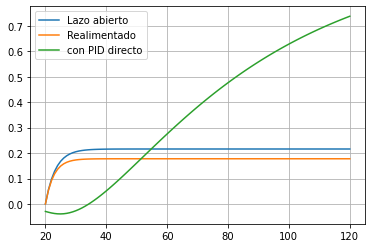

In [84]:
_, yLA = control.step_response(GP,ts)
_, yLC1 = control.step_response(control.feedback(GP,1),ts)
_, yLCPID1 = control.step_response(control.feedback(GC_PID1*GPP_pade,1),ts)

plt.plot(ts,yLA,
         ts,yLC1,
         ts,yLCPID1)
plt.legend(('Lazo abierto','Realimentado','con PID directo'))
plt.grid()


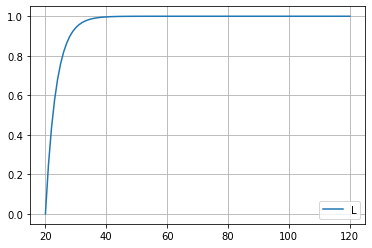

In [85]:
TM = 1.3
TAU = 3.5
GPRUEBA = control.tf([1],[TAU,1])
_, yPRUEBALA = control.step_response(GPRUEBA,ts)
plt.plot(ts,yPRUEBALA)
plt.legend(('Lazo abierto'))
plt.grid()

In [86]:
NUM_TM,DEN_TM = control.pade(TM,1)
TM_TF = control.tf(NUM_TM,DEN_TM)
TM_TF

TransferFunction(array([-1.        ,  1.53846154]), array([1.        , 1.53846154]))

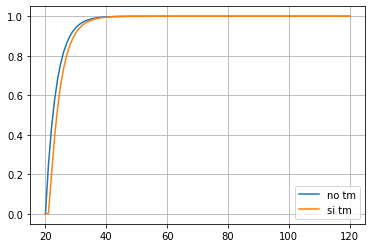

In [87]:
_, yPRUEBALA_TM = control.step_response(GPRUEBA*TM_TF,ts)
plt.plot(ts,yPRUEBALA,ts,yPRUEBALA_TM)
plt.legend(('no tm','si tm'))
plt.grid()

In [88]:
GPRUEBA*TM_TF

TransferFunction(array([-1.        ,  1.53846154]), array([3.5       , 6.38461538, 1.53846154]))

In [89]:
ym = df.Salida
ts = df.Tiempo
interact(resultplot1, K=(-30, 30.0), tau=(-30., 30.), 
         theta=(-30., 30.), y0=(-20., 30.));

interactive(children=(FloatSlider(value=0.0, description='K', max=30.0, min=-30.0), FloatSlider(value=0.0, des…

In [90]:
p_inicial = [12.89, 3.10, 21.90, 3]
[K_2, tau_2, theta_2, y0_2], pcov = scipy.optimize.curve_fit(fopdt, ts, ym, p_inicial)
[K_2, tau_2, theta_2, y0_2]

C:\ProgramData\Anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The MathtextBa

In [91]:
n_pade,d_pade = control.pade(theta_2,1)
Gp_pade = control.tf([K_2/60],[tau_2,1])*control.tf(n_pade,d_pade)
Gp_pade
#control.pzmap(Gp_pade);

TransferFunction(array([-0.21093723,  0.01944961]), array([3.33405017, 1.30741835, 0.09220567]))

In [92]:
KC2 = 1.2*tau_2/(K_2/60*theta_2)
TI2 = 2*theta_2
TD2 = 0.5*theta_2
[KC2,TI2,TD2]

In [93]:
KC2,TI2,TD2 = (0.87,43.38,10.85)

In [94]:
GC_PID2 = KC2*(1 + control.tf(1,[TI2,0]) + control.tf([TD2,0],[0.001*TD2,1]))
GC_PID2

TransferFunction(array([409.89499551,  37.7500395 ,   0.87      ]), array([ 0.470673, 43.38    ,  0.      ]))

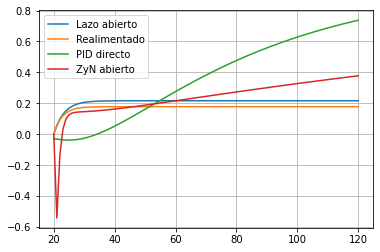

In [95]:

_, yLCPID2 = control.step_response(control.feedback(GC_PID2*Gp_pade,1),ts)

plt.plot(ts,yLA,
         ts,yLC1,
         ts,yLCPID1,
         ts,yLCPID2)
plt.legend(('Lazo abierto','Realimentado','PID directo','ZyN abierto'))
plt.grid()


In [26]:
Gp_pade


TransferFunction(array([-0.21093723,  0.01944961]), array([3.33405017, 1.30741835, 0.09220567]))

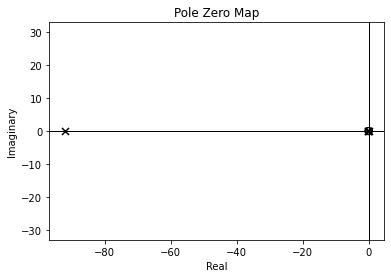

In [27]:
control.pzmap(Gp_pade*GC_PID2 );

In [ ]:
GC_PID2 